# Exercise 4: Double Conditional Graph
For this exercise, build on state machine built in conditional_graph.ipynb and introduce another operation. This means the AgentState will need two more numbers, one more operator and one more result variable.

In [14]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [15]:
# Our state
class AgentState(TypedDict):
    number1: int
    number2: int
    number3: int
    number4: int
    operator1: str
    operator2: str
    result1: int
    result2: int
    counter: int

In [16]:
# Our functional nodes
def adder1(state: AgentState) -> AgentState:
    """
    This node adds first two numbers
    """
    state['result1'] = state['number1'] + state['number2']
    return state

def subtractor1(state: AgentState) -> AgentState:
    """
    This node subtracts number2 from number1
    """
    state['result1'] = state['number1'] - state['number2']
    return state

def adder2(state: AgentState) -> AgentState:
    """
    This node adds second two numbers
    """
    state['result2'] = state['number3'] + state['number4']
    return state

def subtractor2(state: AgentState) -> AgentState:
    """
    This node subtracts number4 from number3
    """
    state['result2'] = state['number3'] - state['number4']
    return state

In [17]:
# Our routers
def router1(state: AgentState) -> str:
    """
    This node selects the next node that should be executed based on the operator given
    """
    # Note that we return the !!edge name!!
    if state['operator1'] == "+":
        return "addition"
    elif state['operator1'] == "-":
        return "subtraction"
    else:
        raise Exception(f"Invalid operator1: {state['operator1']}")
    
def router2(state: AgentState) -> str:
    """
    This node selects the next node that should be executed based on the operator given
    """
    # Note that we return the !!edge name!!
    if state['operator2'] == "+":
        return "addition"
    elif state['operator2'] == "-":
        return "subtraction"
    else:
        raise Exception(f"Invalid operator2: {state['operator2']}")

In [18]:
graph = StateGraph(AgentState)
# Add nodes
graph.add_node(adder1.__name__, adder1)
graph.add_node(subtractor1.__name__, subtractor1)
graph.add_node(adder2.__name__, adder2)
graph.add_node(subtractor2.__name__, subtractor2)
graph.add_node(router1.__name__, lambda state: state)
graph.add_node(router2.__name__, lambda state: state)

# Start
graph.add_edge(START, router1.__name__)

# First routing
graph.add_conditional_edges(
    router1.__name__,
    router1,
    {
        "addition": adder1.__name__,
        "subtraction": subtractor1.__name__
    }
)

# Continue
graph.add_edge(adder1.__name__, router2.__name__)
graph.add_edge(subtractor1.__name__, router2.__name__)

# Second routing
graph.add_conditional_edges(
    router2.__name__,
    router2,
    {
        "addition": adder2.__name__,
        "subtraction": subtractor2.__name__
    }
)

# End
graph.add_edge(adder2.__name__, END)
graph.add_edge(subtractor2.__name__, END)

app = graph.compile()

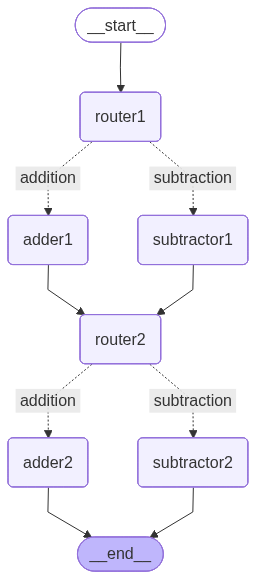

In [19]:
# Now let's visualise this graph
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [20]:
# Now let's run this state machine with different inputs
initial_state: AgentState = {
    'number1': 3,
    'number2': 5,
    'number3': 6,
    'number4': 9,
    'operator1': "+",
    "operator2": "-"
}
final_state: AgentState = app.invoke(initial_state)
print(f"First operation=> {final_state['number1']} {final_state['operator1']} {final_state['number2']} = {final_state['result1']}")
print(f"Second operation=> {final_state['number3']} {final_state['operator2']} {final_state['number4']} = {final_state['result2']}")

First operation=> 3 + 5 = 8
Second operation=> 6 - 9 = -3
